In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

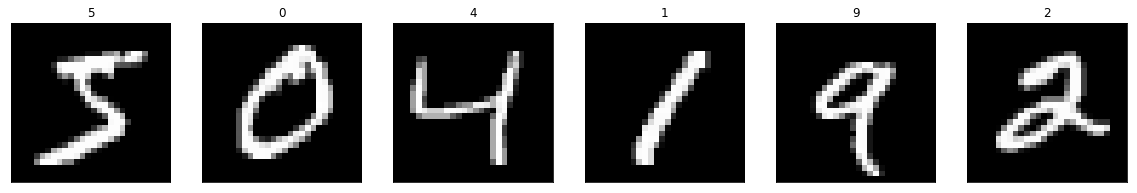

In [6]:
#plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6): 
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i], cmap='gray') 
    ax.set_title(str(y_train[i]))

In [7]:
#rescale the images by dividing every pixel in every image by 255
#rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
#encode categorical integer labels using a one hot scheme
from keras.utils import np_utils

#print first ten (integer valued) training labels
print('Integer valued labels:')
print(y_train[:10])

#one hot encode the labels
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

#print the first ten (one hot) training labels
print('One hot labels')
print(y_train[:10])

Integer valued labels:
[5 0 4 1 9 2 1 3 1 4]
One hot labels
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [14]:
#define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [15]:
#summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

In [16]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])

In [18]:
#evaluate the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Test accuracy: %.4f%%" % accuracy)

Test accuracy: 7.9900%


In [19]:
#train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1,save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=128,epochs=10,validation_split=0.2,callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 0.2727 - acc: 0.9166 - val_loss: 0.1139 - val_acc: 0.9641
Epoch 2/10
48000/48000 [==============================] - 8s - loss: 0.1139 - acc: 0.9659 - val_loss: 0.1052 - val_acc: 0.9701
Epoch 3/10
48000/48000 [==============================] - 8s - loss: 0.0809 - acc: 0.9750 - val_loss: 0.1149 - val_acc: 0.9678
Epoch 4/10
48000/48000 [==============================] - 8s - loss: 0.0651 - acc: 0.9797 - val_loss: 0.0861 - val_acc: 0.9771
Epoch 5/10
48000/48000 [==============================] - 8s - loss: 0.0534 - acc: 0.9843 - val_loss: 0.0868 - val_acc: 0.9792
Epoch 6/10
48000/48000 [==============================] - 8s - loss: 0.0458 - acc: 0.9864 - val_loss: 0.0992 - val_acc: 0.9786
Epoch 7/10
48000/48000 [==============================] - 8s - loss: 0.0386 - acc: 0.9881 - val_loss: 0.1017 - val_acc: 0.9769
Epoch 8/10
48000/48000 [==============================] - 8s 

In [20]:
#evaluate the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Test accuracy: %.4f%%" % accuracy)

Test accuracy: 98.0700%
